### Week 4-9. ODE 알고리즘을 제공하는 소프트웨어

##### scipy.integrate를 이용, RK45를 호출하여 함수, 초기시간, 초기 y, data grid를 설정해주는 input을 넣으면 Runge-Kutta-Fehlberg 방법으로 미분방정식을 풀어준다.

103


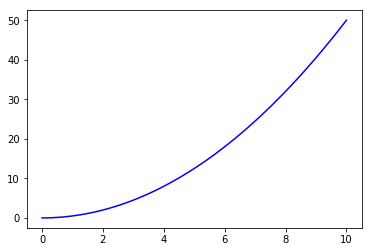

In [31]:
from math import e
from scipy import integrate as inte
import matplotlib.pyplot as plt

def f(t,x):
    return t


solution = inte.RK45(f, 0 , [0], 10, 0.1)

#RK45 input: (function, t0, y0, t_bound, max_step)

# collect data
t_values = []
y_values = []
for i in range(1000):
    # get solution step state
    solution.step() #implemented function in scipy to collect data
    t_values.append(solution.t)
    y_values.append(solution.y[0])
    # break loop after modeling is finished
    if solution.status == 'finished':
        break
#print (t_values)
#print (y_values)
print (len(t_values))
#data = zip(t_values, y_values)
#print (list(data))

plt.plot(t_values, y_values, 'b-')
plt.show()

##### odespy_methods 사용 방법

In [27]:
import odespy
import matplotlib.pyplot as plt


def f(u, t, omega=2):
    v, u = u
    return [-omega**2*u, v]

def compare(odespy_methods,
           omega,
           X_0,
           number_of_periods,
           time_intervals_per_period=20):

    from numpy import pi, linspace, cos
    P = 2*pi/omega
    dt = P/time_intervals_per_period
    T = number_of_periods*P
    
    # If odespy_methods is not a list, but just the name of a single Odespy solver, we wrap that name in a list
    # so we always have odespy_methods as a list
    if type(odespy_methods) != type([]):
        odespy_methods = [odespy_methods]
        
    # Make a list of solver objects
    solvers = [method(f, f_args=[omega]) for method in 
              odespy_methods]
    for solver in solvers:
        solver.set_initial_condition([0, X_0])
        
    # Compute the time points where we wnat the solution
    dt = float(dt) # avoid integer division
    N_t = int(round(T/dt))
    time_points = linspace(0, N_t*dt, N_t+1)
    
    legends = []
    for solver in solvers:
        sol, t = solver.solve(time_points)
        v = sol[:, 0]
        u = sol[:, 1]
        
        # Plot only the last p periods
        p = 6
        m = p*time_intervals_per_period # no time steps to plot
        plt.plot(t[-m:], u[-m:])
        plt.hold('on')
        legends.append(solver.name())
        plt.xlabel('t')
        # Plot exact solution too
        plt.plot(t[-m:], X_0*cos(omega*t)[-m:], 'k--')
        legends.append('exact')
        plt.legend(legends, loc='lower left')
        plt.axis([t[-m], t[-1], -2*X_0, 2*X_0])
        plt.title('Simulation of %d periods with %d intervals per period'
             % (number_of_periods, time_intervals_per_period))
        #plt.savefig('tmp.pdf'); savefig('tmg.png')
        plt.show()

compare(odespy_methods=[odespy.Heun, odespy.EulerCromer],
       omega=2, X_0=2, number_of_periods=20,
       time_intervals_per_period=20)


ModuleNotFoundError: No module named 'odespy'